In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.3.0


In [5]:
# eager_executrion : tensorflow에서 default로 들어감

# 일정한 데이터 값을 얻기 위한 random_seed
tf.random.set_seed(777)

In [11]:
# 데이터

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

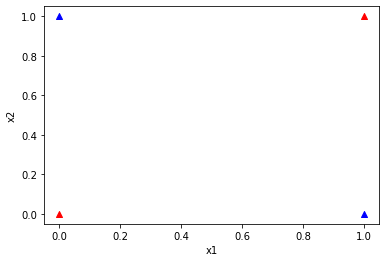

In [15]:
# x_data, y_data를 matplotllib를 사용해 그래프를 그려본다
# 0 : 붉은색, 1 : 푸른색

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [16]:
# 학습시킬 값들을 dataset에 담는다
# batch size : 한번에 학습 시킬 size

dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

In [17]:
# weight와 bias를 구하기 위해 data를 float로 캐스팅 해준다
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [19]:
# 학습시킬 weight, bias를 0으로 초기화시켜 준다
W = tf.Variable(tf.zeros((2, 1)), name = 'weight')
b = tf.Variable(tf.zeros((1,)), name = 'bias')

print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], B = [0.]


In [20]:
# sigmoid : 0과 1의 값만 리턴한다
# sigmoid 함수를 가설로 선언한다
def logistic_regression(features):
    hypo = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypo

In [30]:
# cost 함수 정의
def loss_fn(hypo, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypo))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [34]:
# 0.5를 기준으로 1과 0을 출력할 건지에 대해 결정
def accuracy_fn(hypo, labels):
    predicted = tf.cast(hypo > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.float32))
    return accuracy

In [35]:
# GradientTape를 통해 경사값 계산
def grad(hypo, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features), features, labels)
    return tape.gradient(loss_value, [W,b])

In [36]:
# data를 cost함수를 통해 학습시킨 후 모델 생성

EPOCHS = 1001
for step in range(EPOCHS):
    for features, labels in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data), y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000


In [ ]:
# 일단 logistic_regression을 사용하면 loss 값이 더이상 떨어지지 않는다